<a href="https://colab.research.google.com/github/skyshine460/GHG_Direct_Emissions/blob/main/submit_ghg58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# データの読み込み

目的変数：GHG_Direct_Emissions_14_in_metric_tons


評価指標：RMSLE

In [280]:
train_df = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/test.csv')

In [281]:
# 各カラムのデータ型と欠損値（nan）を表示
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    print(f'(index, col) : {df.shape}')
    return info_df

In [282]:
information_df(train_df)

(index, col) : (4655, 22)


,dtypes,NaN Count,Nunique,Unique Values
Unnamed: 0,int64,0,4655,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
FacilityName,object,0,4531,"[VISCOFAN USA INC, CORNWELL STATION - DOMINION..."
Latitude,float64,102,4492,"[40.141389, 38.475305, 39.29982, 35.490363, 41..."
Longitude,float64,102,4486,"[-87.581111, -81.278957, -80.85717, -119.04295..."
LocationAddress,object,179,4435,"[915 N MICHIGAN AVE, 200 RIVER HAVEN ROAD, 304..."
City,object,0,2588,"[DANVILLE, CLENDENIN, GREENWOOD, BAKERSFIELD, ..."
State,object,0,54,"[IL, WV, CA, OH, OK, NM, TN, LA, TX, IN, NC, M..."
ZIP,object,0,3758,"[61832, 25045-9304, 26415, 93308, 441031047, 7..."
County,object,70,1165,"[VERMILION, KANAWHA, RITCHIE, KERN, CUYAHOGA, ..."
FIPScode,float64,73,1646,"[17183.0, 54039.0, 54085.0, 6029.0, 39035.0, 4..."


In [283]:
information_df(test_df)

(index, col) : (2508, 21)


,dtypes,NaN Count,Nunique,Unique Values
Unnamed: 0,int64,0,2508,"[4655, 4656, 4657, 4658, 4659, 4660, 4661, 466..."
FacilityName,object,0,2462,"[ROGER AOTSCHEGAROW, EPNG STATION 6543 LORDSBU..."
Latitude,float64,56,2437,"[38.03304, 32.31603, 41.2515, 44.95966, 32.818..."
Longitude,float64,56,2435,"[-97.97317, -108.6068, -78.74244, -93.19341, -..."
LocationAddress,object,113,2386,"[1910 SOUTH BROADACRES ROAD, nan, 3831 ROUTE 2..."
City,object,0,1647,"[HUTCHINSON, LORDSBURG, BROCKPORT, SAINT PAUL,..."
State,object,0,54,"[KS, NM, PA, MN, CA, MS, MT, AZ, IN, NY, IL, F..."
ZIP,object,0,2152,"[67501, 88045, 15823, 551141895, 92123, 38606,..."
County,object,45,865,"[RENO, HIDALGO, JEFFERSON, RAMSEY, SAN DIEGO, ..."
FIPScode,float64,45,1162,"[20155.0, 35023.0, 42065.0, 27123.0, 6073.0, 2..."


In [284]:
# object型をcategory型に変換する
def object_to_category(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")

object_to_category(train_df)
object_to_category(test_df)

# 目的変数の確認

In [285]:
# データの分布とQ-Qプロット（category型の場合は分布のみ）
def normal_distribution_fit(df, col, bins):

    from scipy.stats import norm
    from scipy import stats

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    if df[col].dtype == 'object' or df[col].dtype.name == 'category': # category型（もしくはobject型）の場合
        sns.countplot(x=df[col], ax=ax[0])
        ax[0].set_title('Bar Plot of Categorical Data')

    else: # 数値データの場合
        sns.histplot(df[col], kde=True, stat='density', ax=ax[0]) # ヒストグラムを描画

        # 正規分布のフィット
        sns.histplot(df[col], stat='density', ax=ax[0], bins=bins)
        x = np.linspace(df[col].min(), df[col].max(), 100)
        ax[0].plot(x, norm.pdf(x, df[col].mean(), df[col].std()), color='red')
        ax[0].set_title('Histogram with Normal Distribution Fit')

        # Q-Qプロット
        stats.probplot(df[col], plot=ax[1])
        ax[1].set_title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

    # 歪度と尖度の計算(数値データ)
    if df[col].dtype != 'object' and df[col].dtype.name != 'category':
        print(f"Skewness: {df[col].skew()}")
        print(f"Kurtosis: {df[col].kurt()}")

    # 欠損値の確認
    print(f"isnull: {df[col].isnull().sum()}")

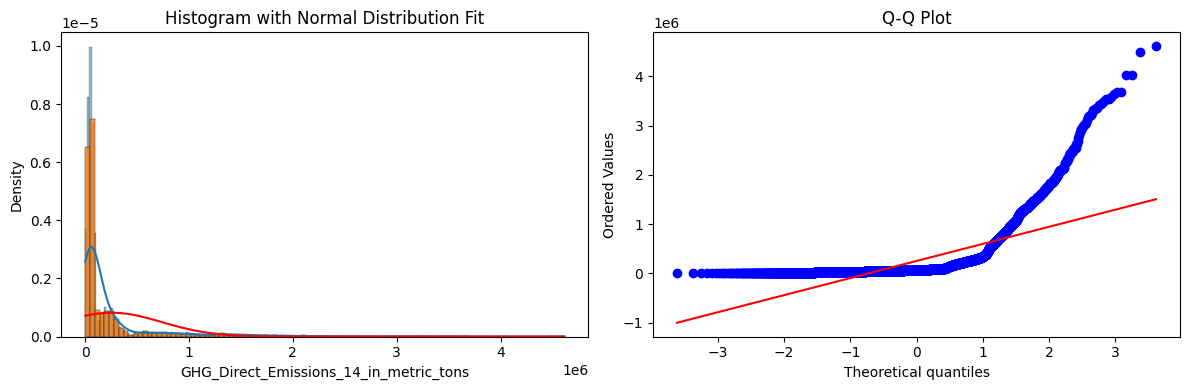

Skewness: 3.6649052199295338
Kurtosis: 16.560320863687245
isnull: 0


In [286]:
normal_distribution_fit(train_df, 'GHG_Direct_Emissions_14_in_metric_tons', bins=100)

左に裾が長いグラフになっている。評価指標もRMSLEなので、対数化のデータも確認する。

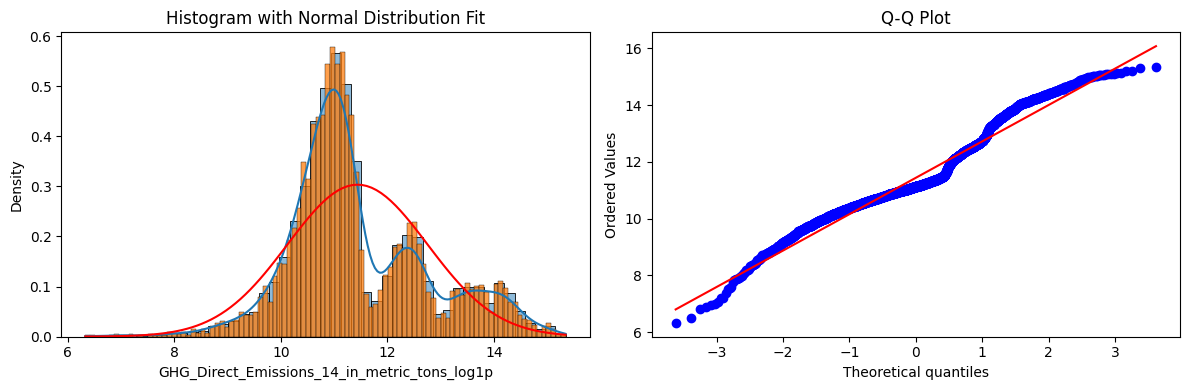

Skewness: 0.545884275422693
Kurtosis: 0.3515490436747801
isnull: 0


In [287]:
train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'] = np.log1p(train_df['GHG_Direct_Emissions_14_in_metric_tons'])
normal_distribution_fit(train_df, 'GHG_Direct_Emissions_14_in_metric_tons_log1p', bins=100)

正規分布に近づいた。ピーク位置が3点（厳密には4点？）ある。
詳細について特徴量エンジニアリングの際に検討する。

# 特徴量エンジニアリング

# ①GHGの過去データ

In [288]:
# GHGの過去データの定義
ghg_features = ['GHG_Direct_Emissions_10_in_metric_tons', 'GHG_Direct_Emissions_11_in_metric_tons', 'GHG_Direct_Emissions_12_in_metric_tons', 'GHG_Direct_Emissions_13_in_metric_tons',]

まずは、目的変数である2014年と過去データの関係性を確認する。
過去データとの相関と平均値の遷移について、生データ値と対数値で確認する。
またtrainデータとtestデータの分布も確認する。

In [289]:
def trans_log1p(df, features):
  for col in features:
    df[f'{col}_log1p'] = np.log1p(df[col])
  return df

train_df = trans_log1p(train_df, ghg_features)
test_df = trans_log1p(test_df, ghg_features)
ghg_log1p_features = ['GHG_Direct_Emissions_10_in_metric_tons_log1p', 'GHG_Direct_Emissions_11_in_metric_tons_log1p', 'GHG_Direct_Emissions_12_in_metric_tons_log1p', 'GHG_Direct_Emissions_13_in_metric_tons_log1p',]

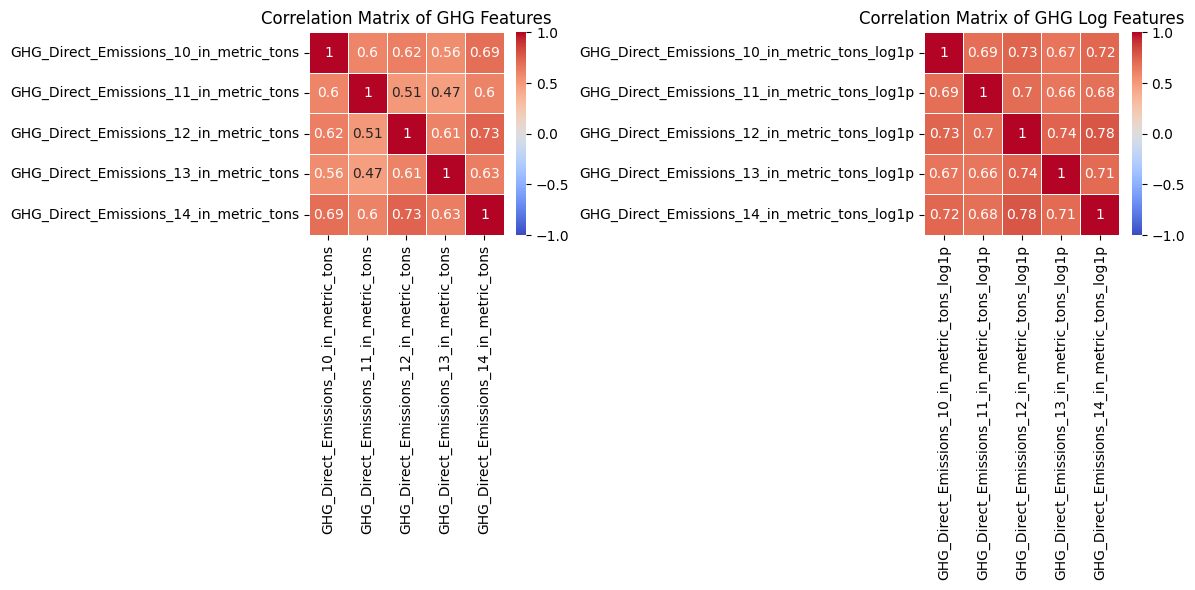

In [290]:
# 過去データとの相関
# プロットの準備
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# GHGの生データ
ghg_corr_features = ghg_features + ['GHG_Direct_Emissions_14_in_metric_tons']
ghg_corr_matrix = train_df[ghg_corr_features].corr()
sns.heatmap(ghg_corr_matrix, annot=True, cmap='coolwarm', ax=axes[0], linewidths=0.5, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of GHG Features')

# 対数変換後のデータ
ghg_log_corr_features = ghg_log1p_features + ['GHG_Direct_Emissions_14_in_metric_tons_log1p']
ghg_corr_matrix_log = train_df[ghg_log_corr_features].corr()
sns.heatmap(ghg_corr_matrix_log, annot=True, cmap='coolwarm', ax=axes[1], linewidths=0.5, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of GHG Log Features')

plt.tight_layout()
plt.show()

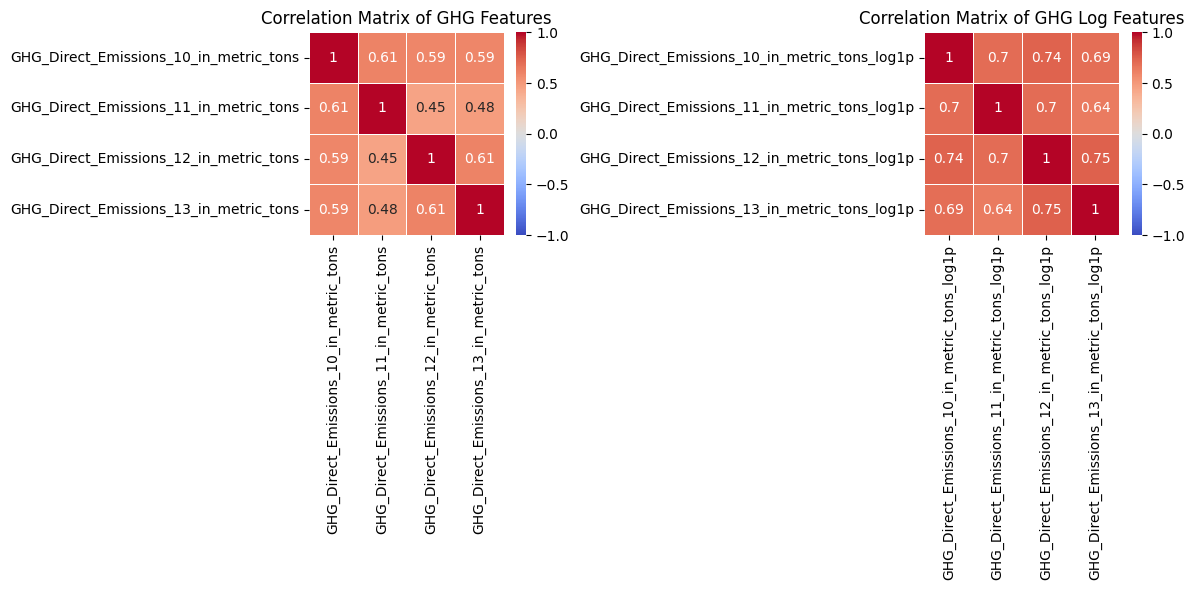

In [291]:
# 過去データとの相関
# プロットの準備
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# GHGの生データ
test_ghg_corr_features = ghg_features
ghg_corr_matrix = test_df[test_ghg_corr_features].corr()
sns.heatmap(ghg_corr_matrix, annot=True, cmap='coolwarm', ax=axes[0], linewidths=0.5, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of GHG Features')

# 対数変換後のデータ
test_ghg_log_corr_features = ghg_log1p_features
ghg_corr_matrix_log = test_df[test_ghg_log_corr_features].corr()
sns.heatmap(ghg_corr_matrix_log, annot=True, cmap='coolwarm', ax=axes[1], linewidths=0.5, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of GHG Log Features')

plt.tight_layout()
plt.show()

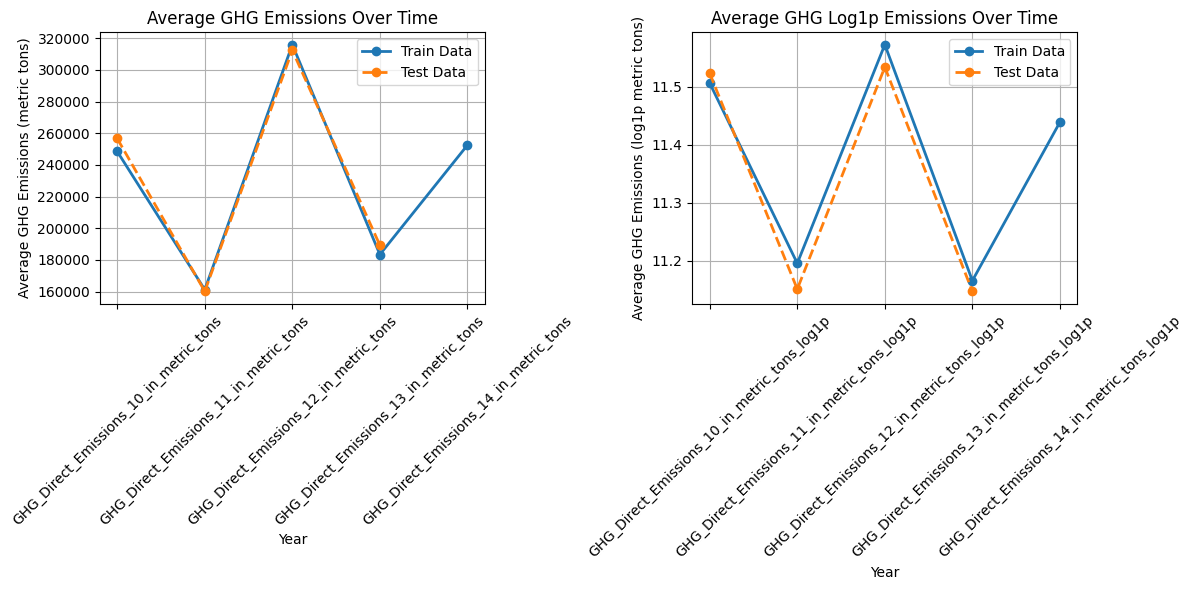

In [292]:
import matplotlib.pyplot as plt

# 平均値の算出（train_df と test_df）
mean_values_ghg_train = train_df[ghg_corr_features].mean()
mean_values_ghg_log1p_train = train_df[ghg_log_corr_features].mean()
mean_values_ghg_test = test_df[test_ghg_corr_features].mean()
mean_values_ghg_log1p_test = test_df[test_ghg_log_corr_features].mean()

# プロットの準備
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# GHG 生データの平均値の推移（train と test の重ね描画）
axes[0].plot(mean_values_ghg_train.index, mean_values_ghg_train.values, marker='o', linestyle='-', linewidth=2, label='Train Data')
axes[0].plot(mean_values_ghg_test.index, mean_values_ghg_test.values, marker='o', linestyle='--', linewidth=2, label='Test Data')
axes[0].set_title('Average GHG Emissions Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average GHG Emissions (metric tons)')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# 対数変換後のデータの平均値の推移（train と test の重ね描画）
axes[1].plot(mean_values_ghg_log1p_train.index, mean_values_ghg_log1p_train.values, marker='o', linestyle='-', linewidth=2, label='Train Data')
axes[1].plot(mean_values_ghg_log1p_test.index, mean_values_ghg_log1p_test.values, marker='o', linestyle='--', linewidth=2, label='Test Data')
axes[1].set_title('Average GHG Log1p Emissions Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average GHG Emissions (log1p metric tons)')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# レイアウトの調整と表示
plt.tight_layout()
plt.show()


＜考察＞



*   過去のデータとあって相関は高め。多重共線性の可能性もあり、GHGと同じ次元のデータを使うときは注意が必要か。
*   生データのだとtrainとtestで平均値はほぼ同じ値を取るが、対数にすると差異が出てくる。他の特徴量の分布の差がある可能性あり。


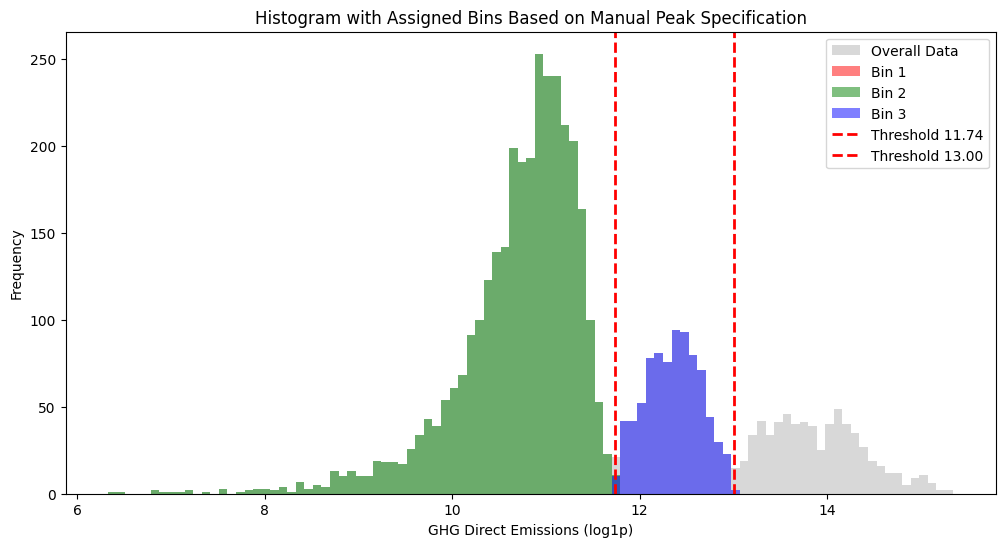

In [293]:
from scipy.signal import find_peaks

# ヒストグラムを作成し、ピークの検出
hist, bin_edges = np.histogram(train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'], bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
peaks, _ = find_peaks(hist, distance=3)  # ピークの検出

# print(f"Peaks positions: {bin_centers[peaks]}")

# # ピークの位置を手動で指定
peaks = [11.19761227, 12.2794425, 13.72188282]
# peaks = peaks.tolist()

# ピークの位置に基づいて閾値を設定
if len(peaks) == 3:
    # thresholds = [(bin_centers[peaks[i]] + bin_centers[peaks[i + 1]]) / 2 for i in range(len(peaks) - 1)]
    # print(f"thresholds: {thresholds}")
    thresholds =  [11.738527387432828, 13.000662661644935]

    # 各データポイントがどのビンに属するかを判断する関数
    def assign_bin(value):
        if np.isnan(value):  # np.isnan() を使って NaN のチェックを行う
            return 0
        elif value < thresholds[0]:
            return 1  # 第1ピークに属する
        elif value < thresholds[1]:
            return 2  # 第2ピークに属する
        else:
            return 3  # 第3ピークに属する

    # 各データポイントにラベルを適用
    labels = train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'].apply(assign_bin)

    # 共通のビン境界を作成
    bins = np.linspace(train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'].min(),
                       train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'].max(), 100)

    # 全体のヒストグラムをプロット
    plt.figure(figsize=(12, 6))
    plt.hist(train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'], bins=bins, alpha=0.3, color='gray', label='Overall Data', density=False)

    # 各ビンに属するデータを可視化
    colors = ['red', 'green', 'blue']
    for i in range(3):
        plt.hist(train_df['GHG_Direct_Emissions_14_in_metric_tons_log1p'][labels == i], bins=bins, alpha=0.5, color=colors[i], label=f'Bin {i+1}', density=False)

    # 閾値に縦線を描画
    for threshold in thresholds:
        plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold {threshold:.2f}')

    plt.xlabel('GHG Direct Emissions (log1p)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Histogram with Assigned Bins Based on Manual Peak Specification')
    plt.show()

# Peaks positions: [11.19761227 12.2794425  13.72188282]
# thresholds: [11.738527387432828, 13.000662661644935]


In [294]:
def plot_histograms_with_thresholds(train_df, test_df, column_num, thresholds, bins=100, x_max=16, x_min=0):
    # カラム名を作成
    col_log_name = f'GHG_Direct_Emissions_{column_num}_in_metric_tons_log1p'

    # 共通のビン境界を作成
    bins = np.linspace(min(train_df[col_log_name].min(), test_df[col_log_name].min()),
                       max(train_df[col_log_name].max(), test_df[col_log_name].max()), bins)

    # ヒストグラムのプロット
    plt.figure(figsize=(12, 6))
    plt.hist(train_df[col_log_name], bins=bins, alpha=0.5, color='blue', label='Train Data', density=False, edgecolor='black')
    plt.hist(test_df[col_log_name], bins=bins, alpha=0.5, color='orange', label='Test Data', density=False, edgecolor='black')

    # 閾値に縦線を描画
    for threshold in thresholds:
        plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold {threshold:.2f}')

    # x軸の範囲設定
    plt.xlim(left=x_min, right=x_max)
    plt.xlabel(f'GHG Direct Emissions {column_num} (log1p)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Histogram of Train and Test Data for GHG Direct Emissions {column_num}')
    plt.show()

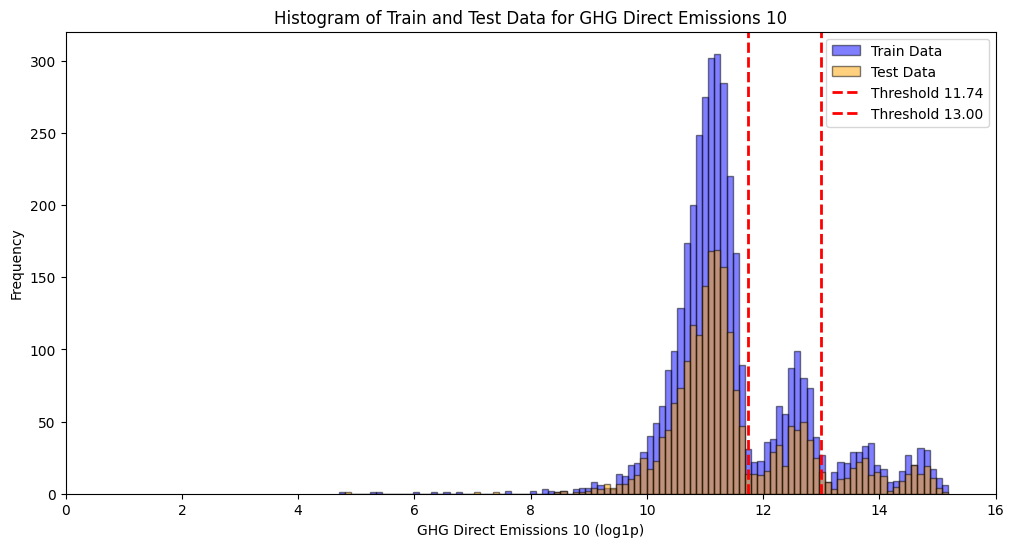

In [295]:
plot_histograms_with_thresholds(train_df, test_df, column_num=10, thresholds=thresholds)

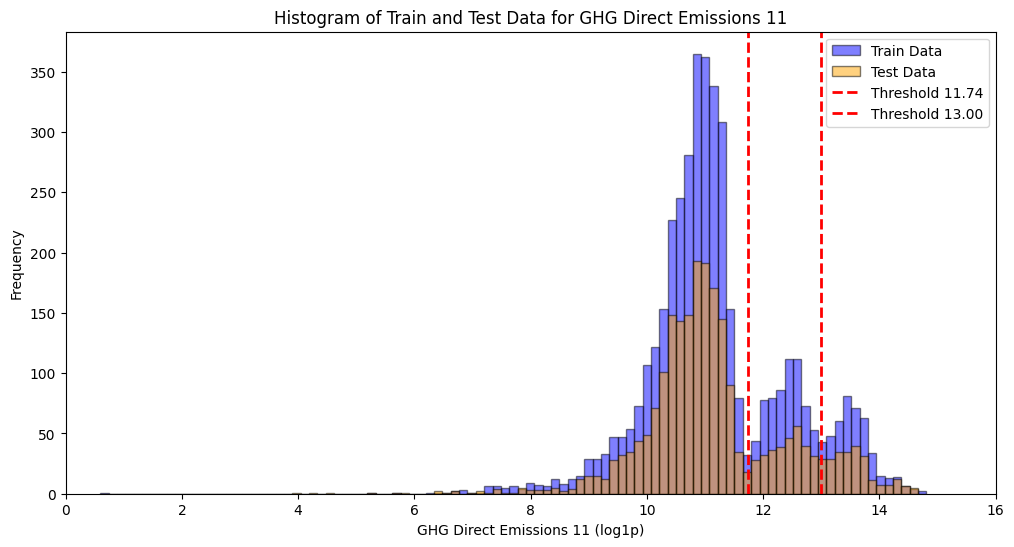

In [296]:
plot_histograms_with_thresholds(train_df, test_df, column_num=11, thresholds=thresholds)

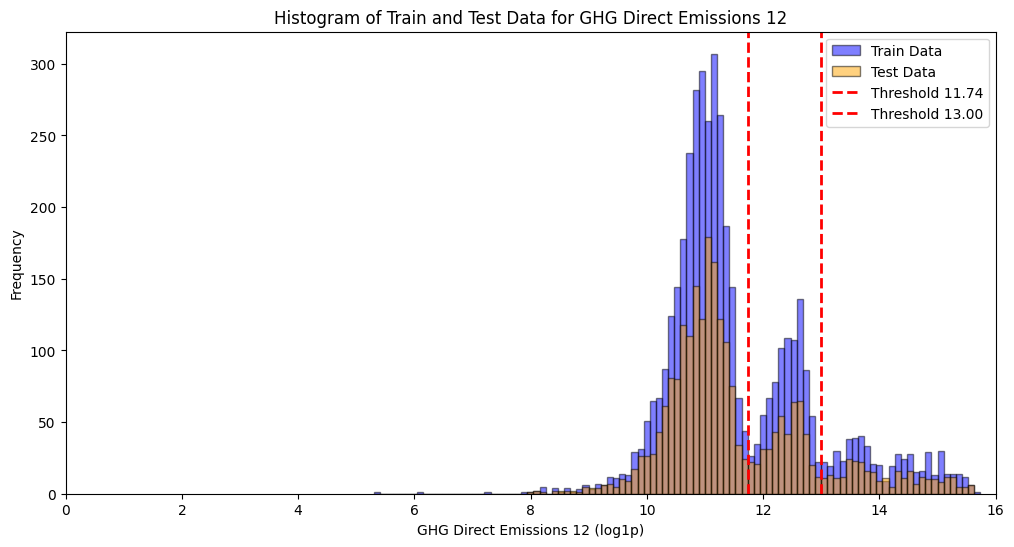

In [297]:
plot_histograms_with_thresholds(train_df, test_df, column_num=12, thresholds=thresholds)

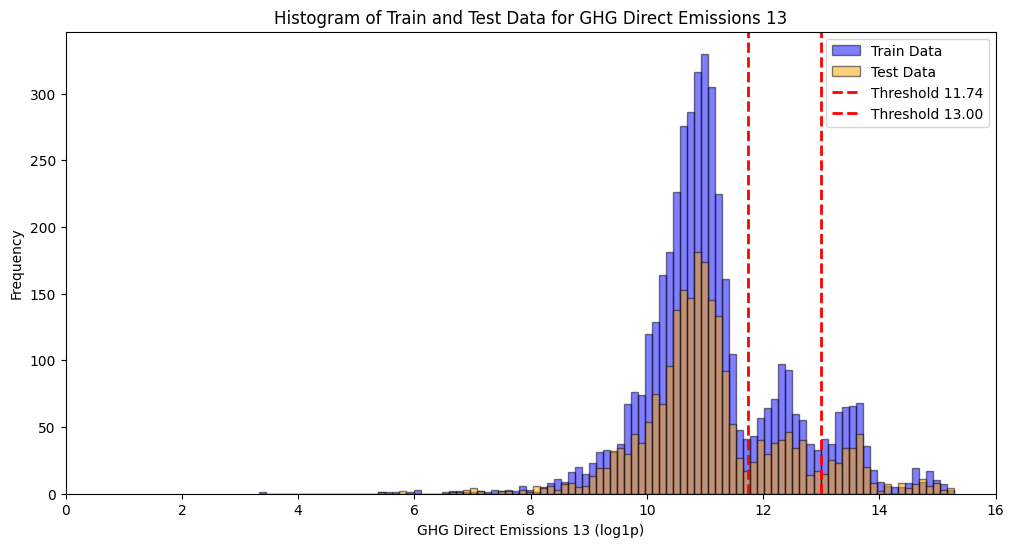

In [298]:
plot_histograms_with_thresholds(train_df, test_df, column_num=13, thresholds=thresholds)

＜考察＞


*   2014年の分布にあった３つのピークは過去のデータ、testデータでも共通している
　　→2014年と同じしきい値でビンニング




In [299]:
def assign_bin(value):
    if np.isnan(value):  # np.isnan() を使って NaN のチェックを行う
        return 0
    elif value < thresholds[0]:
        return 1  # 第1ピークに属する
    elif value < thresholds[1]:
        return 2  # 第2ピークに属する
    else:
        return 3  # 第3ピークに属する

thresholds=[11.738527387432828, 13.000662661644935]

def ghg_binning(df):
    df['GHG_10_bins'] = df['GHG_Direct_Emissions_10_in_metric_tons_log1p'].apply(assign_bin)
    df['GHG_11_bins'] = df['GHG_Direct_Emissions_11_in_metric_tons_log1p'].apply(assign_bin)
    df['GHG_12_bins'] = df['GHG_Direct_Emissions_12_in_metric_tons_log1p'].apply(assign_bin)
    df['GHG_13_bins'] = df['GHG_Direct_Emissions_13_in_metric_tons_log1p'].apply(assign_bin)
    return df

train_df = ghg_binning(train_df)
test_df = ghg_binning(test_df)

In [300]:
def ghg_differnce(df):
    # 各年の差から予測
    df['GHG_diff_13_12'] = df['GHG_Direct_Emissions_13_in_metric_tons'] - df['GHG_Direct_Emissions_12_in_metric_tons']
    df['GHG_diff_12_11'] = df['GHG_Direct_Emissions_12_in_metric_tons'] - df['GHG_Direct_Emissions_11_in_metric_tons']
    df['GHG_diff_11_10'] = df['GHG_Direct_Emissions_11_in_metric_tons'] - df['GHG_Direct_Emissions_10_in_metric_tons']

    df['GHG_from_diff_13_12'] = df['GHG_Direct_Emissions_13_in_metric_tons'] + df['GHG_diff_13_12']
    df['GHG_from_diff_12_11'] = df['GHG_Direct_Emissions_13_in_metric_tons'] + df['GHG_diff_12_11']

    # 直近トレンドをエンコーディング
    df['trend_13_12'] = np.where(df['GHG_diff_13_12'] > 0, 1, 0)
    df['trend_13_11'] = np.where((df['GHG_diff_13_12'] > 0) & (df['GHG_diff_12_11'] > 0), 1, 0)

    return df

train_df = ghg_differnce(train_df)
test_df = ghg_differnce(test_df)

# ②位置に関するデータ

In [301]:
location_features = ['FacilityName', 'Latitude', 'Longitude', 'LocationAddress', 'City', 'State', 'ZIP', 'County']

SIGNATE事務局からの提供のコードをそのまま利用させてもらい。
アメリカ国内の位置関係を把握する。


In [302]:
# import folium
# import matplotlib.cm as cm
# import matplotlib.colors as colors
# from IPython.display import display

# # 必要なデータを抽出し、新しいデータフレームを作成
# data = train_df[['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons']].copy()

# # 緯度、経度、排出量のいずれかが欠損している行を削除
# data.dropna(subset=['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons'], inplace=True)

# # 各列のデータ型を float に変換
# for col in ['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons']:
#     data[col] = data[col].astype(float)

# # 地図の中心をデータの緯度と経度の平均位置に設定
# map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
# m = folium.Map(location=map_center, zoom_start=5)

# # 排出量の最大値と最小値を取得
# max_emission = data['GHG_Direct_Emissions_14_in_metric_tons'].max()
# min_emission = data['GHG_Direct_Emissions_14_in_metric_tons'].min()

# # カラーマップを設定（排出量が少ない地点は黄色、多い地点は赤色で表示）
# colormap = cm.get_cmap('YlOrRd')
# normalize = colors.Normalize(vmin=min_emission, vmax=max_emission)

# # 各地点に対して、排出量に応じた色の円マーカーを作成し地図に追加
# for idx, row in data.iterrows():
#     # 排出量に基づいて色を設定
#     color = colors.rgb2hex(colormap(normalize(row['GHG_Direct_Emissions_14_in_metric_tons'])))

#     # 円マーカーを作成
#     folium.CircleMarker(
#         location=[row['Latitude'], row['Longitude']],  # 緯度・経度
#         radius=5,  # 円のサイズ
#         popup=f"Emissions: {row['GHG_Direct_Emissions_14_in_metric_tons']}",  # ポップアップに排出量を表示
#         color=color,  # 枠の色
#         fill=True,  # 円を塗りつぶす
#         fill_color=color  # 塗りつぶしの色
#     ).add_to(m)

# # 地図を表示（Jupyter Notebook 上で表示可能）
# display(m)

In [303]:
# import folium
# import matplotlib.cm as cm
# import matplotlib.colors as colors
# from IPython.display import display

# # 必要なデータを抽出し、新しいデータフレームを作成
# data = train_df[['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons_log1p']].copy()

# # 緯度、経度、排出量のいずれかが欠損している行を削除
# data.dropna(subset=['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons_log1p'], inplace=True)

# # 各列のデータ型を float に変換
# for col in ['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons_log1p']:
#     data[col] = data[col].astype(float)

# # 地図の中心をデータの緯度と経度の平均位置に設定
# map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
# m = folium.Map(location=map_center, zoom_start=5)

# # 排出量の最大値と最小値を取得
# max_emission = data['GHG_Direct_Emissions_14_in_metric_tons_log1p'].max()
# min_emission = data['GHG_Direct_Emissions_14_in_metric_tons_log1p'].min()

# # カラーマップを設定（排出量が少ない地点は黄色、多い地点は赤色で表示）
# colormap = cm.get_cmap('YlOrRd')
# normalize = colors.Normalize(vmin=min_emission, vmax=max_emission)

# # 各地点に対して、排出量に応じた色の円マーカーを作成し地図に追加
# for idx, row in data.iterrows():
#     # 排出量に基づいて色を設定
#     color = colors.rgb2hex(colormap(normalize(row['GHG_Direct_Emissions_14_in_metric_tons_log1p'])))

#     # 円マーカーを作成
#     folium.CircleMarker(
#         location=[row['Latitude'], row['Longitude']],  # 緯度・経度
#         radius=5,  # 円のサイズ
#         popup=f"Emissions: {row['GHG_Direct_Emissions_14_in_metric_tons_log1p']}",  # ポップアップに排出量を表示
#         color=color,  # 枠の色
#         fill=True,  # 円を塗りつぶす
#         fill_color=color  # 塗りつぶしの色
#     ).add_to(m)

# # 地図を表示（Jupyter Notebook 上で表示可能）
# display(m)

＜考察＞


*   全体的にはまばらなデータに見えるが、離島の値を区別するのに利用される可能性が高い。
*   本土北部や中部に緯度方向に高い値が集中したり、アラスカの値が低かったりと位置情報で差が見られる。



欠損値は住所や施設名から特定することができそうだが、時間がかかるため、今回は見送り。
あとでStateのデータも検証する。

# ③業界に関するデータ

In [304]:
industry_features = ['PrimaryNAICS', 'SecondPrimaryNAICS', 'IndustryType']

In [305]:
naics_types      = {11: 'Agriculture, Forestry, Fishing and Hunting',
                    21: 'Mining, Quarrying, and Oil and Gas Extraction',
                    22: 'Utilities',
                    23: 'Construction',
                    31: 'Manufacturing',
                    32: 'Manufacturing',
                    33: 'Manufacturing',
                    42: 'Wholesale Trade',
                    44: 'Retail Trade',
                    45: 'Retail Trade',
                    48: 'Transportation and Warehousing',
                    49: 'Transportation and Warehousing',
                    51: 'Information',
                    52: 'Finance and Insurance',
                    53: 'Real Estate and Rental and Leasing',
                    54: 'Professional, Scientific, and Technical Services',
                    55: 'Management of Companies and Enterprises',
                    56: 'Administrative and Support and Waste Management and Remediation Services',
                    61: 'Educational Services',
                    62: 'Health Care and Social Assistance',
                    71: 'Arts, Entertainment, and Recreation',
                    72: 'Accommodation and Food Services',
                    81: 'Other Services (except Public Administration)',
                    92: 'Public Administration'}

In [306]:
def industry_columns(df):
    df['PrimaryNAICS_1-2'] = df['PrimaryNAICS'].astype(str).str[:2].astype(int)
    df['PrimaryNAICS_1-3'] = df['PrimaryNAICS'].astype(str).str[:3].astype(int)
    df['PrimaryNAICS_1-4'] = df['PrimaryNAICS'].astype(str).str[:4].astype(int)
    df['NAICS_Type'] = df['PrimaryNAICS_1-2'].map(naics_types).astype('category')

    # 'na' などの変換できない値を NaN にしてから整数に変換
    df['SecondPrimaryNAICS_1-2'] = pd.to_numeric(df['SecondPrimaryNAICS'].astype(str).str[:2], errors='coerce')
    df['Sub_NAICS_Type'] = df['PrimaryNAICS_1-2'].map(naics_types).astype('category')

    return df

train_df = industry_columns(train_df)
test_df = industry_columns(test_df)

# ④TRIの過去データ

In [307]:
tri_features = ['TRI_Air_Emissions_10_in_lbs', 'TRI_Air_Emissions_11_in_lbs', 'TRI_Air_Emissions_12_in_lbs', 'TRI_Air_Emissions_13_in_lbs']

In [308]:
def create_tri_features(df):
    df['TRI_diff_11-10'] = df['TRI_Air_Emissions_11_in_lbs'] - df['TRI_Air_Emissions_10_in_lbs']
    df['TRI_diff_12-11'] = df['TRI_Air_Emissions_12_in_lbs'] - df['TRI_Air_Emissions_11_in_lbs']
    df['TRI_diff_13-12'] = df['TRI_Air_Emissions_13_in_lbs'] - df['TRI_Air_Emissions_12_in_lbs']

    df['TRI_Growth_Rate_11'] = np.where(
        df['TRI_Air_Emissions_10_in_lbs'].notna() & (df['TRI_Air_Emissions_10_in_lbs'] != 0),
        (df['TRI_Air_Emissions_11_in_lbs'] - df['TRI_Air_Emissions_10_in_lbs']) / df['TRI_Air_Emissions_10_in_lbs'], np.nan)

    df['TRI_Growth_Rate_12'] = np.where(
        df['TRI_Air_Emissions_11_in_lbs'].notna() & (df['TRI_Air_Emissions_11_in_lbs'] != 0),
        (df['TRI_Air_Emissions_12_in_lbs'] - df['TRI_Air_Emissions_11_in_lbs']) / df['TRI_Air_Emissions_11_in_lbs'], np.nan)

    df['TRI_Growth_Rate_13'] = np.where(
        df['TRI_Air_Emissions_12_in_lbs'].notna() & (df['TRI_Air_Emissions_12_in_lbs'] != 0),
        (df['TRI_Air_Emissions_13_in_lbs'] - df['TRI_Air_Emissions_12_in_lbs']) / df['TRI_Air_Emissions_12_in_lbs'], np.nan)
    return df

train_df = create_tri_features(train_df)
test_df = create_tri_features(test_df)

# モデル1

In [309]:
features = [
                        'TRI_Air_Emissions_10_in_lbs', 'TRI_Air_Emissions_11_in_lbs',
                    'TRI_Air_Emissions_12_in_lbs', 'TRI_Air_Emissions_13_in_lbs','PrimaryNAICS',
                    'GHG_Direct_Emissions_10_in_metric_tons', 'GHG_Direct_Emissions_11_in_metric_tons',
                    'GHG_Direct_Emissions_12_in_metric_tons', 'GHG_Direct_Emissions_13_in_metric_tons',
                        'Latitude','Longitude',
                        'TRI_diff_11-10','TRI_diff_12-11','TRI_diff_13-12', 'TRI_Growth_Rate_11','TRI_Growth_Rate_12','TRI_Growth_Rate_13',
                        'NAICS_Type',
]

In [310]:

train = train_df[features]
target = train_df['GHG_Direct_Emissions_14_in_metric_tons']
test = test_df[features]

In [311]:
from sklearn.metrics import root_mean_squared_log_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import gc
import numpy as np
import lightgbm as lgb

gc.collect()

def get_models_trained(train, test, target, num_folds):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    oof_predictions = np.zeros(len(train))
    test_predictions = np.zeros(len(test))
    train_predictions = np.zeros(len(train))
    fold_train_rmsle = []

    for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
        print(f"------------------------------ fold {fold} ------------------------------")

        X_train, X_valid = train.iloc[train_index], train.iloc[valid_index]
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]

        model_dict = {}
        loss_dict = {}
        valid_preds_dict = {}
        train_preds_dict = {}
        rmsle_dict = {}

        # モデル1
        params1 = {
            'n_estimators': 595, 'learning_rate': 0.007624351393824647, 'subsample': 0.700276785552184, 'colsample_bytree': 0.7339579594424095, 'reg_alpha': 0.29107185146455633, 'reg_lambda': 2.641123852967307,
            "max_depth": 4,
            "random_state": 42,
            'enable_categorical': True,
        }
        model1 = XGBRegressor(**params1)

        # モデル1の学習と予測
        _ = model1.fit(X_train, np.log1p(y_train))
        valid_preds1 = np.expm1(model1.predict(X_valid))
        train_preds1 = np.expm1(model1.predict(X_train))
        rmsle1 = root_mean_squared_log_error(y_valid, valid_preds1)
        tr_rmsle1 = root_mean_squared_log_error(y_train, train_preds1)
        print(f"Fold {fold} model1 tr:{tr_rmsle1:.5f} va:{rmsle1:.5f}")

        loss_dict["model1"] = rmsle1
        model_dict['model1'] = model1
        valid_preds_dict['model1'] = valid_preds1
        train_preds_dict['model1'] = train_preds1
        rmsle_dict['model1'] = rmsle1

        # モデル2
        params2 = {
            'n_estimators': 496, 'learning_rate': 0.009252715170077622, 'subsample': 0.7167164015002879, 'colsample_bytree': 0.6412076957770685, 'reg_alpha': 0.3696375956764805, 'reg_lambda': 2.467273343804692,
            "max_depth": 4,
            "random_state": 42,
            'enable_categorical': True,
        }
        model2 = XGBRegressor(**params2)

        # モデル2の学習と予測
        _ = model2.fit(X_train, np.log1p(y_train))
        valid_preds2 = np.expm1(model2.predict(X_valid))
        train_preds2 = np.expm1(model2.predict(X_train))
        rmsle2 = root_mean_squared_log_error(y_valid, valid_preds2)
        tr_rmsle2 = root_mean_squared_log_error(y_train, train_preds2)
        print(f"Fold {fold} model2 tr:{tr_rmsle2:.5f} va:{rmsle2:.5f}")

        loss_dict["model2"] = rmsle2
        model_dict['model2'] = model2
        valid_preds_dict['model2'] = valid_preds2
        train_preds_dict['model2'] = train_preds2
        rmsle_dict['model2'] = rmsle2

        # モデル3
        params3 = {
            'n_estimators': 86, 'learning_rate': 0.05997247493517289, 'lambda_l1': 0.039698269771453513, 'lambda_l2': 1.3209099884337212, 'min_data_in_leaf': 35, 'max_bin': 169,
            "max_depth": 3,
            "random_state": 42,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'verbose': -1,

        }
        model3 = LGBMRegressor(**params3)

        # モデル3の学習と予測
        model3.fit(
            X_train,
            np.log1p(y_train),
            eval_set=[(X_valid, y_valid)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)],
        )
        valid_preds3 = np.expm1(model3.predict(X_valid))
        train_preds3 = np.expm1(model3.predict(X_train))
        rmsle3 = root_mean_squared_log_error(y_valid, valid_preds3)
        tr_rmsle3 = root_mean_squared_log_error(y_train, train_preds3)
        print(f"Fold {fold} model3 tr:{tr_rmsle3:.5f} va:{rmsle3:.5f}")

        loss_dict["model3"] = rmsle3
        model_dict['model3'] = model3
        valid_preds_dict['model3'] = valid_preds3
        train_preds_dict['model3'] = train_preds3
        rmsle_dict['model3'] = rmsle3

        # モデル4
        params4 = {
            'n_estimators': 70, 'learning_rate': 0.07163113404511691, 'lambda_l1': 0.018462551672613223, 'lambda_l2': 1.6493096737478277, 'min_data_in_leaf': 34, 'max_bin': 170,
            "max_depth": 3,
            "random_state": 42,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'verbose': -1,
        }
        model4 = LGBMRegressor(**params4)

        # モデル4の学習と予測
        model4.fit(
            X_train,
            np.log1p(y_train),
            eval_set=[(X_valid, y_valid)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)],
        )
        valid_preds4 = np.expm1(model4.predict(X_valid))
        train_preds4 = np.expm1(model4.predict(X_train))
        rmsle4 = root_mean_squared_log_error(y_valid, valid_preds4)
        tr_rmsle4 = root_mean_squared_log_error(y_train, train_preds4)
        print(f"Fold {fold} model4 tr:{tr_rmsle4:.5f} va:{rmsle4:.5f}")

        loss_dict["model4"] = rmsle4
        model_dict['model4'] = model4
        valid_preds_dict['model4'] = valid_preds4
        train_preds_dict['model4'] = train_preds4
        rmsle_dict['model4'] = rmsle4


        # 各モデルの予測の平均値を算出して評価
        valid_preds_mean = np.mean(list(valid_preds_dict.values()), axis=0)
        train_preds_mean = np.mean(list(train_preds_dict.values()), axis=0)

        rmsle_valid_mean = root_mean_squared_log_error(y_valid, valid_preds_mean)
        rmsle_train_mean = root_mean_squared_log_error(y_train, train_preds_mean)

        rmsle_mean = root_mean_squared_log_error(y_valid, valid_preds_mean)
        min_loss_model = min(loss_dict, key=loss_dict.get)
        model = model_dict[min_loss_model]
        valid_preds_best_model = np.expm1(model.predict(X_valid))
        rmsle_best = root_mean_squared_log_error(y_valid, valid_preds_best_model)
        train_preds_best_model = np.expm1(model.predict(X_train))
        tr_rmsle_best = root_mean_squared_log_error(y_train, train_preds_best_model)

        print(f"Fold {fold} Ave    tr:{rmsle_train_mean:.5f} va:{rmsle_valid_mean:.5f}")

        oof_predictions[valid_index] = valid_preds_mean
        train_predictions[train_index] = train_preds_mean

        # テストデータの予測
        test_preds = model.predict(test)
        test_predictions += test_preds / kf.n_splits

        gc.collect()

    RMSLE = root_mean_squared_log_error(target, oof_predictions)
    tr_RMSLE = root_mean_squared_log_error(target, train_predictions)
    print()
    print(f"[CV] tr:{tr_RMSLE:.5f} va:{RMSLE:.5f}")

    return oof_predictions, train_predictions, np.expm1(test_predictions)

oof_predictions, train_predictions, test_predictions = get_models_trained(train, test, target, 15)

------------------------------ fold 0 ------------------------------
Fold 0 model1 tr:0.70012 va:0.67748
Fold 0 model2 tr:0.70112 va:0.67819
Fold 0 model3 tr:0.72742 va:0.67949
Fold 0 model4 tr:0.72750 va:0.68055
Fold 0 Ave    tr:0.71288 va:0.67811
------------------------------ fold 1 ------------------------------
Fold 1 model1 tr:0.69307 va:0.77721
Fold 1 model2 tr:0.69464 va:0.77829
Fold 1 model3 tr:0.72051 va:0.77796
Fold 1 model4 tr:0.72103 va:0.77987
Fold 1 Ave    tr:0.70620 va:0.77711
------------------------------ fold 2 ------------------------------
Fold 2 model1 tr:0.69485 va:0.75916
Fold 2 model2 tr:0.69555 va:0.75827
Fold 2 model3 tr:0.72296 va:0.76148
Fold 2 model4 tr:0.72352 va:0.76049
Fold 2 Ave    tr:0.70797 va:0.75849
------------------------------ fold 3 ------------------------------
Fold 3 model1 tr:0.69938 va:0.68740
Fold 3 model2 tr:0.69981 va:0.68591
Fold 3 model3 tr:0.72738 va:0.68358
Fold 3 model4 tr:0.72730 va:0.68320
Fold 3 Ave    tr:0.71228 va:0.68386
----

In [312]:
submit1 = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/sample_submission.csv', header=None)
submit1[1] = test_predictions
submit1.to_csv('submit_ghg27.csv', header=None, index=False)

# 投稿ファイルの中身を確認
submit1.head()

,0,1
0,4655,45622.472972
1,4656,304601.456863
2,4657,41595.694120
3,4658,27629.564470
4,4659,46908.888179


# モデル２

In [313]:
features = [
                        'TRI_Air_Emissions_10_in_lbs',
                        'TRI_Air_Emissions_11_in_lbs',
                    'TRI_Air_Emissions_12_in_lbs', 'TRI_Air_Emissions_13_in_lbs','PrimaryNAICS',
                    'GHG_Direct_Emissions_10_in_metric_tons',
                        'GHG_Direct_Emissions_11_in_metric_tons',
                    'GHG_Direct_Emissions_12_in_metric_tons', 'GHG_Direct_Emissions_13_in_metric_tons',
                        'Latitude','Longitude',
                        'TRI_diff_11-10',
                        'TRI_diff_12-11','TRI_diff_13-12',
                        'TRI_Growth_Rate_11',
                        'TRI_Growth_Rate_12','TRI_Growth_Rate_13',
                        'NAICS_Type',
                        'GHG_diff_13_12',
 'GHG_diff_12_11',
 'GHG_diff_11_10',
]

In [314]:
train = train_df[features]
target = train_df['GHG_Direct_Emissions_14_in_metric_tons']
test = test_df[features]

In [315]:
from sklearn.metrics import root_mean_squared_log_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import gc
import numpy as np
import lightgbm as lgb

gc.collect()

def get_models_trained(train, test, target, num_folds):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    oof_predictions = np.zeros(len(train))
    test_predictions1 = np.zeros(len(test))
    train_predictions = np.zeros(len(train))
    fold_train_rmsle = []

    for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
        print(f"------------------------------ fold {fold} ------------------------------")

        X_train, X_valid = train.iloc[train_index], train.iloc[valid_index]
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]

        model_dict = {}
        loss_dict = {}
        valid_preds_dict = {}
        train_preds_dict = {}
        rmsle_dict = {}

        # モデル1
        params1 = {
            # [CV] tr:0.69257 va:0.75665
            'n_estimators': 582, 'learning_rate': 0.007812579712416915, 'subsample': 0.65624102176123, 'colsample_bytree': 0.7141531203417487, 'reg_alpha': 0.24300082283028274, 'reg_lambda': 1.9230733030185878,
            "max_depth": 4,
            "random_state": 42,
            'enable_categorical': True,
        }

        model1 = XGBRegressor(**params1)

        # モデル1の学習と予測
        _ = model1.fit(X_train, np.log1p(y_train))
        valid_preds1 = np.expm1(model1.predict(X_valid))
        train_preds1 = np.expm1(model1.predict(X_train))
        rmsle1 = root_mean_squared_log_error(y_valid, valid_preds1)
        tr_rmsle1 = root_mean_squared_log_error(y_train, train_preds1)
        print(f"Fold {fold} model1 tr:{tr_rmsle1:.5f} va:{rmsle1:.5f}")

        loss_dict["model1"] = rmsle1
        model_dict['model1'] = model1
        valid_preds_dict['model1'] = valid_preds1
        train_preds_dict['model1'] = train_preds1
        rmsle_dict['model1'] = rmsle1

        # モデル2
        params2 = {
            # [CV] tr:0.69634 va:0.75690
            'n_estimators': 549, 'learning_rate': 0.008289310393873825, 'subsample': 0.6594561397042182, 'colsample_bytree': 0.6411024078584135, 'reg_alpha': 0.6040913459999436, 'reg_lambda': 3.0828495121526642,
            "max_depth": 4,
            "random_state":42,
            'enable_categorical': True,
        }

        model2 = XGBRegressor(**params2)

        # モデル2の学習と予測
        _ = model2.fit(X_train, np.log1p(y_train))
        valid_preds2 = np.expm1(model2.predict(X_valid))
        train_preds2 = np.expm1(model2.predict(X_train))
        rmsle2 = root_mean_squared_log_error(y_valid, valid_preds2)
        tr_rmsle2 = root_mean_squared_log_error(y_train, train_preds2)
        print(f"Fold {fold} model2 tr:{tr_rmsle2:.5f} va:{rmsle2:.5f}")

        loss_dict["model2"] = rmsle2
        model_dict['model2'] = model2
        valid_preds_dict['model2'] = valid_preds2
        train_preds_dict['model2'] = train_preds2
        rmsle_dict['model2'] = rmsle2

        # モデル3
        params3 = {
            # [CV] tr:0.71539 va:0.75777
            'n_estimators': 98, 'learning_rate': 0.07124872149258375, 'lambda_l1': 0.01292705115972963, 'lambda_l2': 4.112239455674573, 'min_data_in_leaf': 35, 'max_bin': 172,
            "max_depth": 3,
            "random_state": 42,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'verbose': -1,
        }

        model3 = LGBMRegressor(**params3)

        # モデル3の学習と予測
        model3.fit(
            X_train,
            np.log1p(y_train),
            eval_set=[(X_valid, y_valid)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)],
        )
        valid_preds3 = np.expm1(model3.predict(X_valid))
        train_preds3 = np.expm1(model3.predict(X_train))
        rmsle3 = root_mean_squared_log_error(y_valid, valid_preds3)
        tr_rmsle3 = root_mean_squared_log_error(y_train, train_preds3)
        print(f"Fold {fold} model3 tr:{tr_rmsle3:.5f} va:{rmsle3:.5f}")

        loss_dict["model3"] = rmsle3
        model_dict['model3'] = model3
        valid_preds_dict['model3'] = valid_preds3
        train_preds_dict['model3'] = train_preds3
        rmsle_dict['model3'] = rmsle3

        # モデル4
        params4 = {
            # [CV] tr:0.72003 va:0.75741
            'n_estimators': 89, 'learning_rate': 0.06651190855525979, 'lambda_l1': 0.010075671539000321, 'lambda_l2': 4.605744791291716, 'min_data_in_leaf': 37, 'max_bin': 179,
            "max_depth": 3,
            "random_state": 42,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'verbose': -1,
        }
        model4 = LGBMRegressor(**params4)

        # モデル4の学習と予測
        model4.fit(
            X_train,
            np.log1p(y_train),
            eval_set=[(X_valid, y_valid)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)],
        )
        valid_preds4 = np.expm1(model4.predict(X_valid))
        train_preds4 = np.expm1(model4.predict(X_train))
        rmsle4 = root_mean_squared_log_error(y_valid, valid_preds4)
        tr_rmsle4 = root_mean_squared_log_error(y_train, train_preds4)
        print(f"Fold {fold} model4 tr:{tr_rmsle4:.5f} va:{rmsle4:.5f}")

        loss_dict["model4"] = rmsle4
        model_dict['model4'] = model4
        valid_preds_dict['model4'] = valid_preds4
        train_preds_dict['model4'] = train_preds4
        rmsle_dict['model4'] = rmsle4


        # 各モデルの予測の平均値を算出して評価
        valid_preds_mean = np.mean(list(valid_preds_dict.values()), axis=0)
        train_preds_mean = np.mean(list(train_preds_dict.values()), axis=0)

        rmsle_valid_mean = root_mean_squared_log_error(y_valid, valid_preds_mean)
        rmsle_train_mean = root_mean_squared_log_error(y_train, train_preds_mean)

        rmsle_mean = root_mean_squared_log_error(y_valid, valid_preds_mean)
        min_loss_model = min(loss_dict, key=loss_dict.get)
        model = model_dict[min_loss_model]
        valid_preds_best_model = np.expm1(model.predict(X_valid))
        rmsle_best = root_mean_squared_log_error(y_valid, valid_preds_best_model)
        train_preds_best_model = np.expm1(model.predict(X_train))
        tr_rmsle_best = root_mean_squared_log_error(y_train, train_preds_best_model)

        print(f"Fold {fold} Ave    tr:{rmsle_train_mean:.5f} va:{rmsle_valid_mean:.5f}")

        oof_predictions[valid_index] = valid_preds_mean
        train_predictions[train_index] = train_preds_mean

        # テストデータの予測
        test_preds1 = model.predict(test)
        test_predictions1 += test_preds1 / kf.n_splits

        gc.collect()

    RMSLE = root_mean_squared_log_error(target, oof_predictions)
    tr_RMSLE = root_mean_squared_log_error(target, train_predictions)
    print()
    print(f"[CV] tr:{tr_RMSLE:.5f} va:{RMSLE:.5f}")

    return oof_predictions, train_predictions, np.expm1(test_predictions1)

oof_predictions, train_predictions, test_predictions1 = get_models_trained(train, test, target, 15)

------------------------------ fold 0 ------------------------------
Fold 0 model1 tr:0.69605 va:0.67948
Fold 0 model2 tr:0.70031 va:0.67867
Fold 0 model3 tr:0.71959 va:0.68368
Fold 0 model4 tr:0.72335 va:0.68239
Fold 0 Ave    tr:0.70870 va:0.67998
------------------------------ fold 1 ------------------------------
Fold 1 model1 tr:0.68983 va:0.77515
Fold 1 model2 tr:0.69368 va:0.77532
Fold 1 model3 tr:0.71238 va:0.77775
Fold 1 model4 tr:0.71759 va:0.77972
Fold 1 Ave    tr:0.70228 va:0.77583
------------------------------ fold 2 ------------------------------
Fold 2 model1 tr:0.69221 va:0.75972
Fold 2 model2 tr:0.69625 va:0.76076
Fold 2 model3 tr:0.71681 va:0.76341
Fold 2 model4 tr:0.71885 va:0.75852
Fold 2 Ave    tr:0.70479 va:0.75906
------------------------------ fold 3 ------------------------------
Fold 3 model1 tr:0.69591 va:0.68932
Fold 3 model2 tr:0.69972 va:0.68888
Fold 3 model3 tr:0.71902 va:0.68691
Fold 3 model4 tr:0.72248 va:0.68713
Fold 3 Ave    tr:0.70815 va:0.68692
----

In [316]:
submit2 = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/sample_submission.csv', header=None)
submit2[1] = test_predictions1
# submit2.to_csv('submit_ghg46.csv', header=None, index=False)

# 投稿ファイルの中身を確認
submit2.head()

,0,1
0,4655,45605.148353
1,4656,295888.387163
2,4657,41539.105354
3,4658,27802.039636
4,4659,45664.412650


# モデル３


In [317]:
train_df2 = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/train.csv')
test_df2 = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/test.csv')

Adversarial Validation AUC: 0.5507
The training and test distributions are similar.


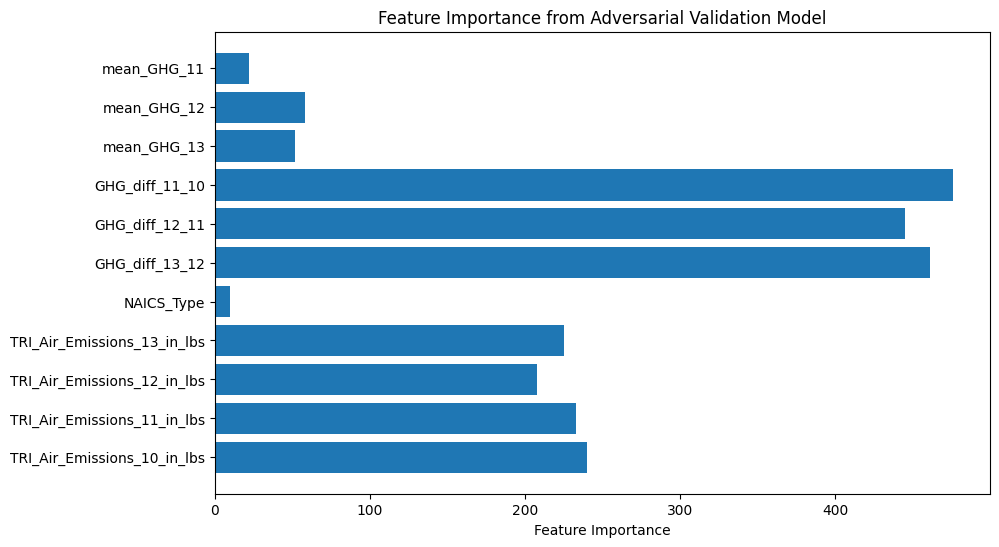

Accuracy: 0.6595


In [318]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

# Assuming train_df and test_df are your training and test dataframes




# train_df = train_df.fillna()
# test_df = test_df.fillna()

# Prepare the data by adding a "label" column
train_df2['label'] = 0
test_df2['label'] = 1

# Concatenate train and test data
combined_df = pd.concat([train_df2, test_df2], axis=0)

# Convert object columns to category
def convert_object_to_category(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df
combined_df = convert_object_to_category(combined_df)

# Remove columns
combined_df = combined_df.drop(columns=['Unnamed: 0', 'FacilityName', 'LocationAddress', 'ZIP', 'GHG_Direct_Emissions_14_in_metric_tons', 'IndustryType'])

# PrimaryNAICSを文字数ごとに分割
naics_types      = {11: 'Agriculture, Forestry, Fishing and Hunting',
                    21: 'Mining, Quarrying, and Oil and Gas Extraction',
                    22: 'Utilities',
                    23: 'Construction',
                    31: 'Manufacturing',
                    32: 'Manufacturing',
                    33: 'Manufacturing',
                    42: 'Wholesale Trade',
                    44: 'Retail Trade',
                    45: 'Retail Trade',
                    48: 'Transportation and Warehousing',
                    49: 'Transportation and Warehousing',
                    51: 'Information',
                    52: 'Finance and Insurance',
                    53: 'Real Estate and Rental and Leasing',
                    54: 'Professional, Scientific, and Technical Services',
                    55: 'Management of Companies and Enterprises',
                    56: 'Administrative and Support and Waste Management and Remediation Services',
                    61: 'Educational Services',
                    62: 'Health Care and Social Assistance',
                    71: 'Arts, Entertainment, and Recreation',
                    72: 'Accommodation and Food Services',
                    81: 'Other Services (except Public Administration)',
                    92: 'Public Administration'}
combined_df['PrimaryNAICS_1-2'] = combined_df['PrimaryNAICS'].astype(str).str[:2].astype(int)
combined_df['NAICS_Type'] = combined_df['PrimaryNAICS_1-2'].map(naics_types).astype('category')

# 各年の差から予測
combined_df['GHG_diff_13_12'] = combined_df['GHG_Direct_Emissions_13_in_metric_tons'] - combined_df['GHG_Direct_Emissions_12_in_metric_tons']
combined_df['GHG_diff_12_11'] = combined_df['GHG_Direct_Emissions_12_in_metric_tons'] - combined_df['GHG_Direct_Emissions_11_in_metric_tons']
combined_df['GHG_diff_11_10'] = combined_df['GHG_Direct_Emissions_11_in_metric_tons'] - combined_df['GHG_Direct_Emissions_10_in_metric_tons']

# Calculate the aggregated values
grouped1 = combined_df.groupby('NAICS_Type')['GHG_Direct_Emissions_13_in_metric_tons'].agg(['mean']).rename(columns={'mean': 'mean_GHG_13'})
grouped2 = combined_df.groupby('NAICS_Type')['GHG_Direct_Emissions_12_in_metric_tons'].agg(['mean']).rename(columns={'mean': 'mean_GHG_12'})
grouped3 = combined_df.groupby('NAICS_Type')['GHG_Direct_Emissions_11_in_metric_tons'].agg(['mean']).rename(columns={'mean': 'mean_GHG_11'})

# Merge the aggregated data back into the original dataframe
combined_df = pd.merge(combined_df, grouped1, on='NAICS_Type', how='left')
combined_df = pd.merge(combined_df, grouped2, on='NAICS_Type', how='left')
combined_df = pd.merge(combined_df, grouped3, on='NAICS_Type', how='left')



# Separate features and target
feature = [
  'TRI_Air_Emissions_10_in_lbs',
 'TRI_Air_Emissions_11_in_lbs',
 'TRI_Air_Emissions_12_in_lbs',
 'TRI_Air_Emissions_13_in_lbs', 'NAICS_Type',
 'GHG_diff_13_12', 'GHG_diff_12_11', 'GHG_diff_11_10',
  'mean_GHG_13', 'mean_GHG_12', 'mean_GHG_11'
]
X = combined_df[feature]
y = combined_df['label']



# Split combined data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an adversarial model using LightGBM
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'random_state': 42
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)])

# Evaluate the model
y_pred = model.predict(X_valid, num_iteration=model.best_iteration)
auc_score = roc_auc_score(y_valid, y_pred)
print(f'Adversarial Validation AUC: {auc_score:.4f}')

# Interpretation
if auc_score > 0.75:
    print("Warning: The training and test distributions are significantly different.")
elif auc_score < 0.6:
    print("The training and test distributions are similar.")
else:
    print("The training and test distributions have some differences, but not significant.")

# Feature importance
importance = model.feature_importance()
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Adversarial Validation Model')
plt.show()

from sklearn.metrics import accuracy_score

# Convert predicted probabilities to binary values using a threshold of 0.5
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

In [319]:
# Adversarialモデルを使って全データのテスト分布に似ているスコアを計算
combined_df['adv_score'] = model.predict(X, num_iteration=model.best_iteration)

# 元のtrainデータのみにフィルタリング
train_only_df = combined_df[combined_df['label'] == 0]

# スコアでソート
train_only_df = train_only_df.sort_values(by='adv_score', ascending=False)

# インデックス番号を取得
train_indices = train_only_df.index

# 8:2にデータを分割（テスト分布に近いデータをバリデーションに）
n_total = len(train_indices)
n_valid = n_total // 5  # 20%をバリデーションとする
valid_indices = train_indices[:n_valid]
train_indices = train_indices[n_valid:]

# インデックスで分けてデータセットを作成
X_train_new = X.loc[train_indices]
y_train_new = y.loc[train_indices]
X_valid_new = X.loc[valid_indices]
y_valid_new = y.loc[valid_indices]

# インデックスを保存してダウンロード可能な状態に
indices_train_df = pd.DataFrame({'train_indices': train_indices})
# indices_train_df.to_csv('train_indices.csv', index=False)

indices_valid_df = pd.DataFrame({'valid_indices': valid_indices})
# indices_valid_df.to_csv('valid_indices.csv', index=False)

In [320]:

features = [
                        'TRI_Air_Emissions_10_in_lbs',
                        'TRI_Air_Emissions_11_in_lbs',
                    'TRI_Air_Emissions_12_in_lbs', 'TRI_Air_Emissions_13_in_lbs','PrimaryNAICS',
                    'GHG_Direct_Emissions_10_in_metric_tons',
                        'GHG_Direct_Emissions_11_in_metric_tons',
                    'GHG_Direct_Emissions_12_in_metric_tons', 'GHG_Direct_Emissions_13_in_metric_tons',
                        'Latitude','Longitude',
                        'TRI_diff_11-10',
                        'TRI_diff_12-11','TRI_diff_13-12',
                        'TRI_Growth_Rate_11',
                        'TRI_Growth_Rate_12','TRI_Growth_Rate_13',
                        'NAICS_Type',
                        'GHG_diff_13_12',
 'GHG_diff_12_11',
 'GHG_diff_11_10',
                         'GHG_10_bins',
 'GHG_11_bins',
 'GHG_12_bins',
 'GHG_13_bins'
]

In [321]:
train = train_df[features]
target = train_df['GHG_Direct_Emissions_14_in_metric_tons']
test = test_df[features]

train_indices = [int(i) for i in train_indices if pd.notna(i)]
valid_indices = [int(i) for i in valid_indices if pd.notna(i)]

# インデックスで分けてデータセットを作成
X_train = train.iloc[train_indices]
y_train = target.iloc[train_indices]
X_valid = train.iloc[valid_indices]
y_valid = target.iloc[valid_indices]

In [322]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clear memory
gc.collect()
np.random.seed(42)

# Prepare new dataset
train = train_df[features].loc[train_indices]
target = train_df['GHG_Direct_Emissions_14_in_metric_tons'].loc[train_indices]
valid = train_df[features].loc[valid_indices]
valid_target = train_df['GHG_Direct_Emissions_14_in_metric_tons'].loc[valid_indices]
test = test_df[features]

# Split valid_data into 3 folds
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = []
models = []

# Track overall training and validation RMSLE across folds
overall_train_rmsle_sum = 0
overall_valid_rmsle_sum = 0

for fold, (train_idx, valid_idx) in enumerate(kf.split(valid)):
    print(f"------------------------------ fold {fold} ------------------------------")

    # Split valid data into train and validation for this fold
    fold_valid = valid.iloc[valid_idx]
    fold_valid_target = valid_target.iloc[valid_idx]
    fold_unused_valid = valid.iloc[train_idx]
    fold_unused_valid_target = valid_target.iloc[train_idx]

    # Create train data (original train data + unused validation data)
    X_train = pd.concat([train, fold_unused_valid])
    y_train = pd.concat([target, fold_unused_valid_target])
    X_valid = fold_valid
    y_valid = fold_valid_target

    # Model 1 parameters
    params1 = {
#         [I 2024-12-04 12:40:34,444] Trial 15 finished with value: 0.7272956311599695 and parameters: {'n_estimators': 692, 'max_depth': 4, 'learning_rate': 0.00851085015647349, 'subsample': 0.6456135434367848, 'colsample_bytree': 0.6053595774004252, 'reg_alpha': 0.3138850583219387, 'reg_lambda': 1.2523183307011438}. Best is trial 15 with value: 0.7272956311599695.
# fold2 Tr: 0.68066, Va: 0.72029
# ------------------------------
# Overall Tr: 0.67977, Va: 0.72730
            'n_estimators': 692, 'max_depth': 4, 'learning_rate': 0.00851085015647349, 'subsample': 0.6456135434367848, 'colsample_bytree': 0.6053595774004252, 'reg_alpha': 0.3138850583219387, 'reg_lambda': 1.2523183307011438,
            # "max_depth": 4,
            "random_state": 42,
            'enable_categorical': True,
        }

    # Train Model 1
    model1 = XGBRegressor(**params1)
    _ = model1.fit(X_train, np.log1p(y_train))
    valid_preds1 = np.expm1(model1.predict(X_valid))
    train_preds1 = np.expm1(model1.predict(X_train))

    # Calculate RMSLE
    rmsle1 = np.sqrt(mean_squared_log_error(y_valid, valid_preds1))
    tr_rmsle1 = np.sqrt(mean_squared_log_error(y_train, train_preds1))
    print(f"model1 Tr: {tr_rmsle1:.5f}, Va: {rmsle1:.5f}")

    # Save results
    cv_results.append((tr_rmsle1, rmsle1))
    models.append(model1)

    # Model 2 parameters
    params2 = {
#         [I 2024-12-04 12:40:23,765] Trial 14 finished with value: 0.7273174891096255 and parameters: {'n_estimators': 659, 'max_depth': 4, 'learning_rate': 0.008578606414651845, 'subsample': 0.6427382315387189, 'colsample_bytree': 0.6014814235546819, 'reg_alpha': 0.32530698454644386, 'reg_lambda': 1.0261714704765408}. Best is trial 14 with value: 0.7273174891096255.
# fold2 Tr: 0.68221, Va: 0.72079
# ------------------------------
# Overall Tr: 0.68160, Va: 0.72732
            'n_estimators': 659, 'max_depth': 4, 'learning_rate': 0.008578606414651845, 'subsample': 0.6427382315387189, 'colsample_bytree': 0.6014814235546819, 'reg_alpha': 0.32530698454644386, 'reg_lambda': 1.0261714704765408,
            # "max_depth": 4,
            "random_state": 42,
            'enable_categorical': True,
        }

    # Train Model 2
    model2 = XGBRegressor(**params2)
    _ = model2.fit(X_train, np.log1p(y_train))
    valid_preds2 = np.expm1(model2.predict(X_valid))
    train_preds2 = np.expm1(model2.predict(X_train))

    # Calculate RMSLE
    rmsle2 = np.sqrt(mean_squared_log_error(y_valid, valid_preds2))
    tr_rmsle2 = np.sqrt(mean_squared_log_error(y_train, train_preds2))
    print(f"model2 Tr: {tr_rmsle2:.5f}, Va: {rmsle2:.5f}")

    # Save results
    cv_results.append((tr_rmsle2, rmsle2))
    models.append(model2)

        # モデル3
    params3 = {
#         [I 2024-12-04 12:38:35,038] Trial 13 finished with value: 0.7254575534234468 and parameters: {'n_estimators': 96, 'learning_rate': 0.0600877155512441, 'lambda_l1': 0.015006895076785879, 'lambda_l2': 1.0809525135673914, 'min_data_in_leaf': 41, 'max_bin': 166}. Best is trial 13 with value: 0.7254575534234468.
# fold2 Tr: 0.72383, Va: 0.72023
# ------------------------------
# Overall Tr: 0.72216, Va: 0.72546
            'n_estimators': 96, 'learning_rate': 0.0600877155512441, 'lambda_l1': 0.015006895076785879, 'lambda_l2': 1.0809525135673914, 'min_data_in_leaf': 41, 'max_bin': 166,
            "max_depth": 3,
            "random_state": 42,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'verbose': -1,
        }

    model3 = LGBMRegressor(**params3)
    # Train Model 3
    model3.fit(
        X_train,
        np.log1p(y_train),
        eval_set=[(X_valid, y_valid)],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=False),
            lgb.log_evaluation(0)],
    )

    valid_preds3 = np.expm1(model3.predict(X_valid))
    train_preds3 = np.expm1(model3.predict(X_train))

    # Calculate RMSLE
    rmsle3 = np.sqrt(mean_squared_log_error(y_valid, valid_preds3))
    tr_rmsle3 = np.sqrt(mean_squared_log_error(y_train, train_preds3))
    print(f"model3 Tr: {tr_rmsle3:.5f}, Va: {rmsle3:.5f}")

    # Save results
    cv_results.append((tr_rmsle3, rmsle3))
    models.append(model3)


    # モデル4
    params4 = {
#         [I 2024-12-04 12:38:37,207] Trial 15 finished with value: 0.7264279937955805 and parameters: {'n_estimators': 97, 'learning_rate': 0.0787815305414043, 'lambda_l1': 0.016010316841795123, 'lambda_l2': 1.2864920807744369, 'min_data_in_leaf': 36, 'max_bin': 179}. Best is trial 13 with value: 0.7254575534234468.
# fold1 Tr: 0.71234, Va: 0.75374
# fold2 Tr: 0.71448, Va: 0.71862
# ------------------------------
# Overall Tr: 0.71394, Va: 0.72643
            'n_estimators': 97, 'learning_rate': 0.0787815305414043, 'lambda_l1': 0.016010316841795123, 'lambda_l2': 1.2864920807744369, 'min_data_in_leaf': 36, 'max_bin': 179,
            "max_depth": 3,
            "random_state": 42,
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'verbose': -1,
        }
    model4 = LGBMRegressor(**params4)

    # Train Model 4
    model4.fit(
        X_train,
        np.log1p(y_train),
        eval_set=[(X_valid, y_valid)],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=False),
            lgb.log_evaluation(0)],
    )

    valid_preds4 = np.expm1(model4.predict(X_valid))
    train_preds4 = np.expm1(model4.predict(X_train))

    # Calculate RMSLE
    rmsle4 = np.sqrt(mean_squared_log_error(y_valid, valid_preds4))
    tr_rmsle4 = np.sqrt(mean_squared_log_error(y_train, train_preds4))
    print(f"model4 Tr: {tr_rmsle4:.5f}, Va: {rmsle4:.5f}")

    # Save results
    cv_results.append((tr_rmsle4, rmsle4))
    models.append(model4)

    # Ensemble predictions by averaging
    train_preds_mean = (train_preds1 + train_preds2 + train_preds3 + train_preds4) / 4
    valid_preds_mean = (valid_preds1 + valid_preds2 + valid_preds4 + valid_preds4) / 4

    # Calculate RMSLE for ensemble
    final_rmsle_train = np.sqrt(mean_squared_log_error(y_train, train_preds_mean))
    final_rmsle_valid = np.sqrt(mean_squared_log_error(y_valid, valid_preds_mean))
    print(f"Ave    Tr: {final_rmsle_train:.5f}, Va: {final_rmsle_valid:.5f}")

    # Accumulate the RMSLEs for overall metrics
    overall_train_rmsle_sum += final_rmsle_train
    overall_valid_rmsle_sum += final_rmsle_valid

# Calculate and print the average RMSLE across all folds
average_train_rmsle = overall_train_rmsle_sum / num_folds
average_valid_rmsle = overall_valid_rmsle_sum / num_folds
print('-'*30)
print(f"Overall Tr: {average_train_rmsle:.5f}, Va: {average_valid_rmsle:.5f}")

# Predictions for test data using ensemble
test_predictions1 = np.expm1(model1.predict(test))
test_predictions2 = np.expm1(model2.predict(test))
test_predictions3 = np.expm1(model3.predict(test))
test_predictions4 = np.expm1(model4.predict(test))
test_predictions = (test_predictions1 + test_predictions2 + test_predictions3 + test_predictions4) / 4

------------------------------ fold 0 ------------------------------
model1 Tr: 0.68110, Va: 0.70712
model2 Tr: 0.68273, Va: 0.70685
model3 Tr: 0.72239, Va: 0.70354
model4 Tr: 0.71500, Va: 0.70692
Ave    Tr: 0.69863, Va: 0.70590
------------------------------ fold 1 ------------------------------
model1 Tr: 0.67755, Va: 0.75448
model2 Tr: 0.67987, Va: 0.75432
model3 Tr: 0.72025, Va: 0.75260
model4 Tr: 0.71234, Va: 0.75374
Ave    Tr: 0.69591, Va: 0.75318
------------------------------ fold 2 ------------------------------
model1 Tr: 0.68066, Va: 0.72029
model2 Tr: 0.68221, Va: 0.72079
model3 Tr: 0.72383, Va: 0.72023
model4 Tr: 0.71448, Va: 0.71862
Ave    Tr: 0.69852, Va: 0.71833
------------------------------
Overall Tr: 0.69768, Va: 0.72581


In [323]:
submit3 = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/sample_submission.csv', header=None)
submit3[1] = test_predictions
# submit2.to_csv('submit_ghg51.csv', header=None, index=False)

# 投稿ファイルの中身を確認
submit3.head()

,0,1
0,4655,45176.133123
1,4656,303079.602857
2,4657,41935.259867
3,4658,28832.963711
4,4659,47894.276261


# 提出データ作成

In [324]:
test_prediction = submit1.iloc[:, 1] + submit2.iloc[:, 1] * 0.5 + submit3.iloc[:, 1]
test_prediction = test_prediction / 2.5
test_prediction = test_prediction.reset_index(drop=True)
submit = pd.read_csv('/content/drive/MyDrive/GHGの排出量の予測にチャレンジしよう！（SMBC Group GREEN×DATA Challenge 2024）/提供データ/sample_submission.csv', header=None)
submit[1] = test_prediction
submit.to_csv('submit_ghg58.csv', header=None, index=False)

# 投稿ファイルの中身を確認
submit.head()

,0,1
0,4655,45440.472109
1,4656,302250.101321
2,4657,41720.202666
3,4658,28145.419200
4,4659,47054.148306
